# Ford GoBike System Data Visualization happened on Feb, 2018
## by Mohamed Elaraby

## Investigation Overview

> in this presentation I will analyze the Ford GoBike System data happened in February 2018, my visualization will focus on the duration, start_time(day, hour) and user type

## Dataset Overview

> GoBike Data is a dataset for bike trips happened on Febraury 2018, Each trip is anonymized and includes:-
- Trip Duration (seconds).
- Start Time and Date.
- End Time and Date
- Start Station ID.
- Start Station Name.
- Start Station Latitude.
- Start Station Longitude.
- End Station ID.
- End Station Name.
- End Station Latitude.
- End Station Longitude.
- Bike ID.
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual).

data source: https://www.lyft.com/bikes/bay-wheels/system-data

In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import matplotlib.gridspec as gridspec

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('Ford GoBike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [8]:
df[['start_time','end_time']]= df[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['user_type']= df['user_type'].astype('category')

# we will extract month, dayofweek, hour from the start_time
df['start_month']= df.start_time.dt.strftime('%b')
df['start_day_week']= df.start_time.dt.strftime('%a')
df['start_hour']= df.start_time.dt.strftime('%H')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_month,start_day_week,start_hour
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,Feb,Wed,23
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6,The Embarcadero at Sansome St,37.804770,-122.403234,324,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,Feb,Wed,23
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No,Feb,Wed,18
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No,Feb,Wed,18
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308,San Pedro Square,37.336802,-121.894090,297,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes,Feb,Wed,23


## distribution of duration using histogram
### it seems to be normally distributed
- with range of 60 seconds to > 20K seconds.
- the most common values almost in the range of 200:2K seconds.

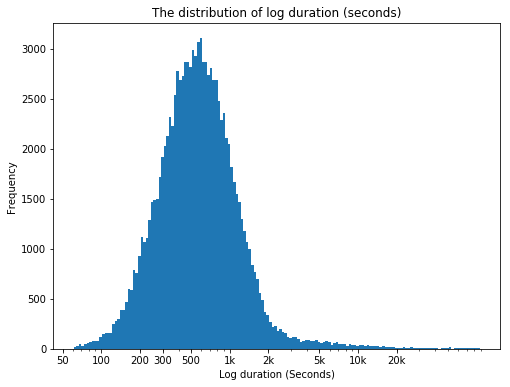

In [16]:
plt.figure(figsize=[8,6])
bins= 10** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+0.02, 0.02)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,500, '1k', '2k', '5k', '10k', '20k'])
plt.title('The distribution of log duration (seconds)')
plt.xlabel('Log duration (Seconds)')
plt.ylabel('Frequency');

## Month/Day/Hour Biker Trensds 
- all data recorded at February.
- Tuesday, Thursday, Wedensday almost equal and have the most bikers in the week.
- 8 AM and 5 PM is the most hours have bikers in the day.

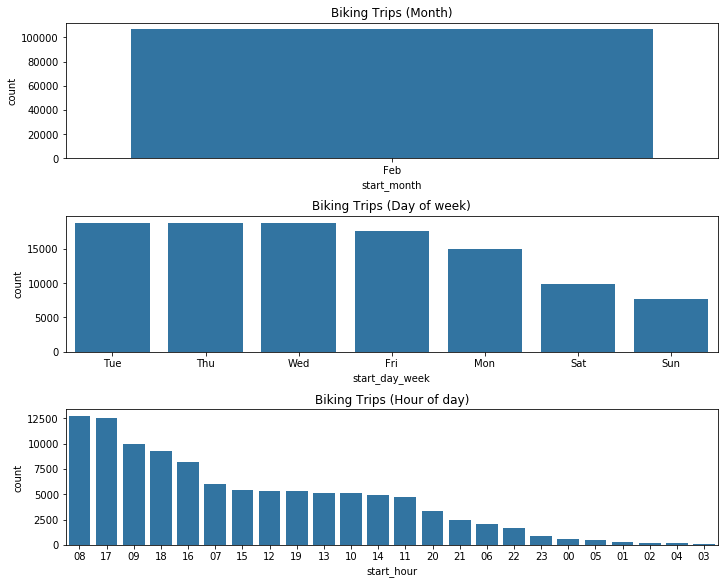

In [47]:
fig, ax = plt.subplots(nrows=3, figsize = [10,8], constrained_layout=True)
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color = default_color, order=df.start_month.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'start_day_week', color = default_color, order=df.start_day_week.value_counts().index, ax = ax[1])
sb.countplot(data = df, x = 'start_hour', color = default_color, order=df.start_hour.value_counts().index, ax = ax[2])
ax[0].set_title('Biking Trips (Month)')
ax[1].set_title('Biking Trips (Day of week)')
ax[2].set_title('Biking Trips (Hour of day)');

## User types Vs. Duration
- the median duration of cutomer type is higher than median duration of subscriber type.


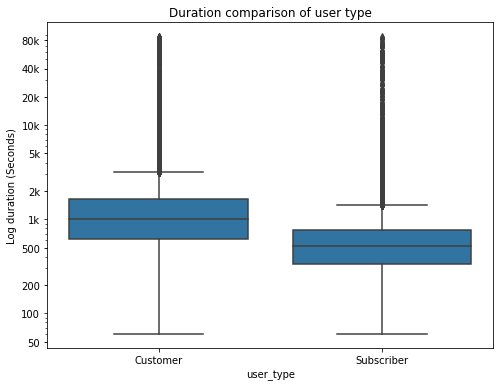

In [15]:
plt.figure(figsize=[8,6])
base_color= sb.color_palette()[0]
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k'])
plt.title('Duration comparison of user type')
plt.ylabel('Log duration (Seconds)');

## Duration during the weekday and hour 
- Friday and Thursday have the longest duration compared to other days of the week.
- 2 AM, 3 AM and 4 AM have the most duration compared to other hours of the day.

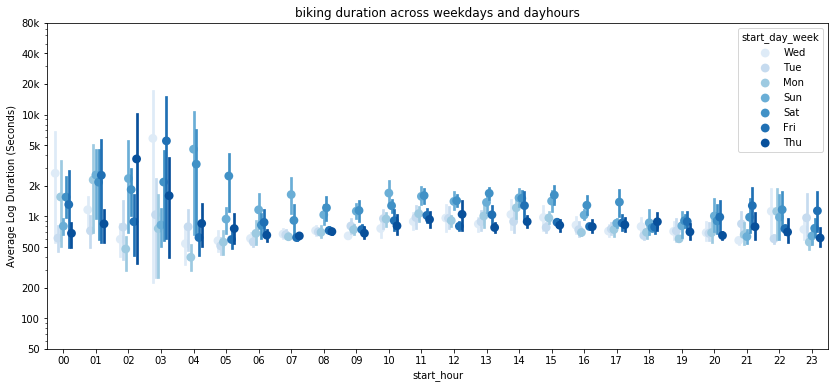

In [17]:
plt.figure(figsize=[14,6])
sb.pointplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'start_day_week',
             dodge = 0.5, linestyles = "",palette='Blues')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k'])
plt.title('biking duration across weekdays and dayhours')
plt.ylabel('Average Log Duration (Seconds)');

## user types duration acroos weekday
- during all days of week the median (duration) of customer type is higher than the median (duration) of subscriber type.

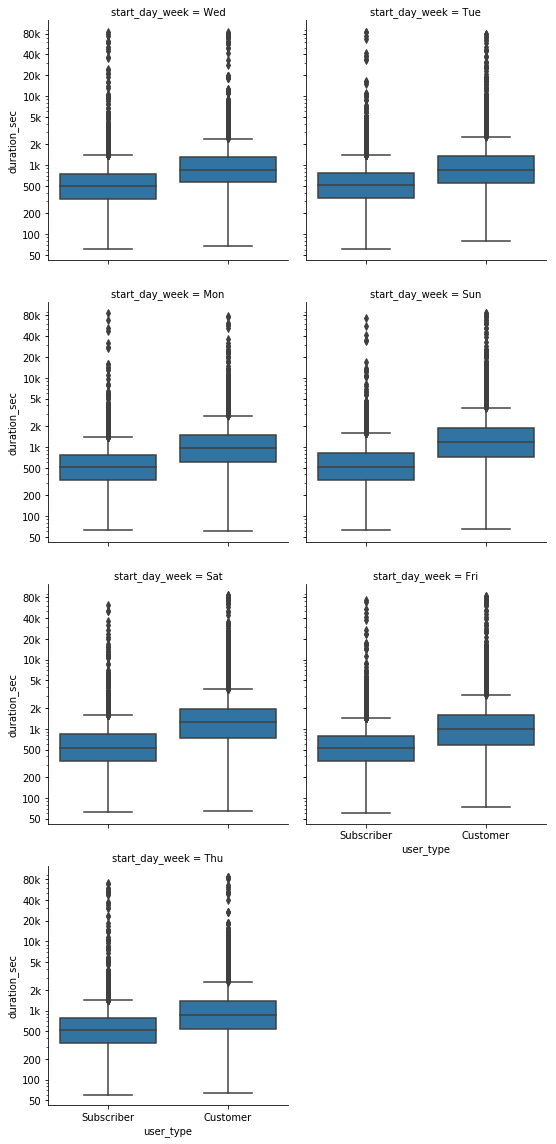

In [18]:
g = sb.FacetGrid(data = df, col = 'start_day_week',col_wrap=2, height = 4)
g.map(sb.boxplot, 'user_type', 'duration_sec',order=df.user_type.value_counts().index)
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k']);

## user types duration acroos hours of the day
- for customer type 3 AM, 4 AM the duration of biking is longer than any hour.
- for subscriber type 2 AM, 3 AM the duration of biking is longer than any hour.

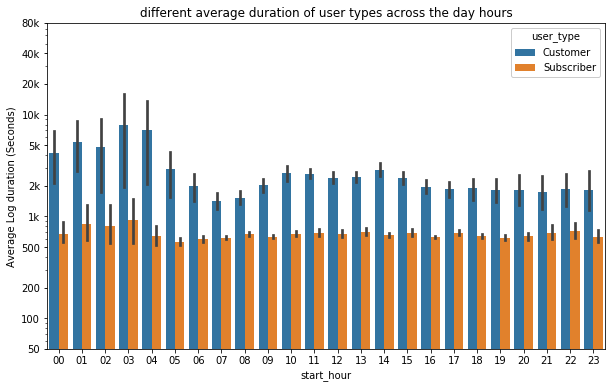

In [20]:
plt.figure(figsize=[10,6])
ax = sb.barplot(data = df, x = 'start_hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.yscale('log')
plt.yticks([50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4,4e4,8e4], [50,100,200,500, '1k', '2k', '5k', '10k', '20k','40k','80k'])
plt.title('different average duration of user types across the day hours')
plt.ylabel('Average Log duration (Seconds)');